In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import butter, lfilter, freqz, detrend
from scipy.optimize import curve_fit
from sklearn import linear_model
from scipy import stats

In [3]:
sns.set()
sns.set_style('ticks')
sns.set_context('notebook')

# Reading data

In [4]:
df = pd.read_csv('/home/julia/projects/calcium_bold/calcium_data/20190503_1457_0.3.csv')

In [5]:
df.head()

,timepoint[ms],signal[V]
0,0.0,0.035471
1,1.0,0.035471
2,2.0,0.035471
3,3.0,0.035471
4,4.0,0.035471


In [32]:
data = df['signal[V]']
timepoints = df['timepoint[ms]']

# Sliding window

In [33]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [34]:
window = 10
binned_data = np.mean(rolling_window(data, window), -1)

In [59]:
tstart = 71000
tend = 83000

<IPython.core.display.Javascript object>


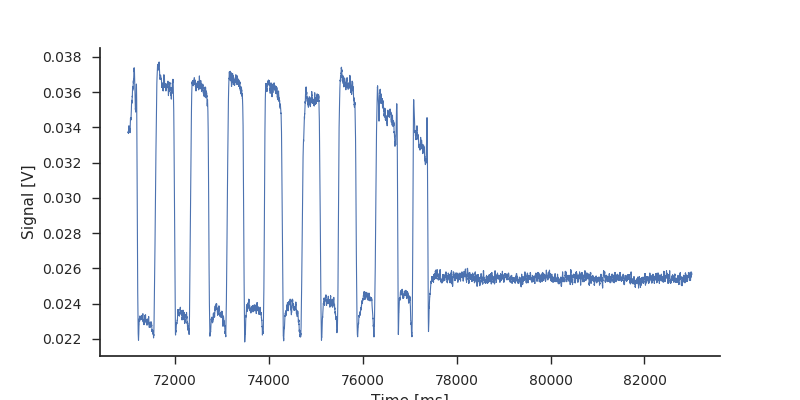

In [60]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Signal [V]")
ax1.plot(timepoints[window-1:][tstart:tend], binned_data[tstart:tend], linewidth=0.8)
sns.despine()

# Calculate intensity increase

In [91]:
up_thr = 0.033
down_thr = 0.025
signal_start = 71000
signal_end = 77000
data_signal = binned_data[signal_start:signal_end]
up = np.where(data_signal >= up_thr)
down = np.where(data_signal < down_thr)

<IPython.core.display.Javascript object>


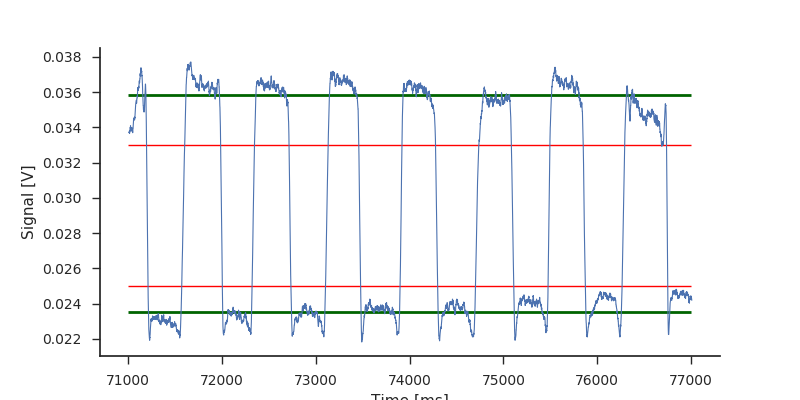

In [119]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Signal [V]")
ax1.plot(timepoints[window-1:][signal_start:signal_end], data_signal, linewidth=0.8)
plt.hlines([up_thr, down_thr], signal_start, signal_end, linewidth=1, color='red')
plt.hlines([np.mean(data_signal[up]), np.mean(data_signal[down])], signal_start, signal_end, linewidth=2, color='darkgreen')
sns.despine()

In [113]:
increase = (np.mean(data_signal[up]) - np.mean(data_signal[down]))
perc_increase = increase / np.mean(data_signal[down]) * 100
print("absolut increase: ", np.round(increase, 4))
print("percent increase: ",np.round(perc_increase, 2))

absolut increase:  0.0123
percent increase:  52.38


In [114]:
noise_start = 78000
noise_end = 83000
data_noise = binned_data[noise_start:noise_end]

<IPython.core.display.Javascript object>


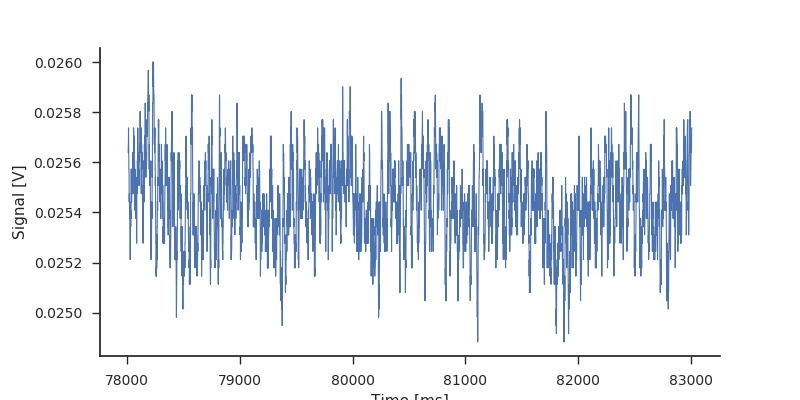

In [123]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Signal [V]")
ax1.plot(timepoints[window-1:][noise_start:noise_end], data_noise, linewidth=0.8)
sns.despine()

In [129]:
print("increase in std: ", np.round(increase/np.std(data_noise), 4))

increase in std:  73.7489
